In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [50]:
df = pd.read_csv('E-commerce Customer Behavior - Sheet1.csv')

 Data Understanding

In [51]:
print("First 5 Rows:")
print(df.head())

First 5 Rows:
   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3 

In [52]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [53]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Customer ID         Age  Total Spend  Items Purchased  Average Rating  \
count   350.000000  350.000000   350.000000       350.000000      350.000000   
mean    275.500000   33.597143   845.381714        12.600000        4.019143   
std     101.180532    4.870882   362.058695         4.155984        0.580539   
min     101.000000   26.000000   410.800000         7.000000        3.000000   
25%     188.250000   30.000000   502.000000         9.000000        3.500000   
50%     275.500000   32.500000   775.200000        12.000000        4.100000   
75%     362.750000   37.000000  1160.600000        15.000000        4.500000   
max     450.000000   43.000000  1520.100000        21.000000        4.900000   

       Days Since Last Purchase  
count                350.000000  
mean                  26.588571  
std                   13.440813  
min                    9.000000  
25%                   15.000000  
50%                   23.000000  
75%                 

In [54]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


Data Preprocessing

In [55]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [56]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

 Data Visualization

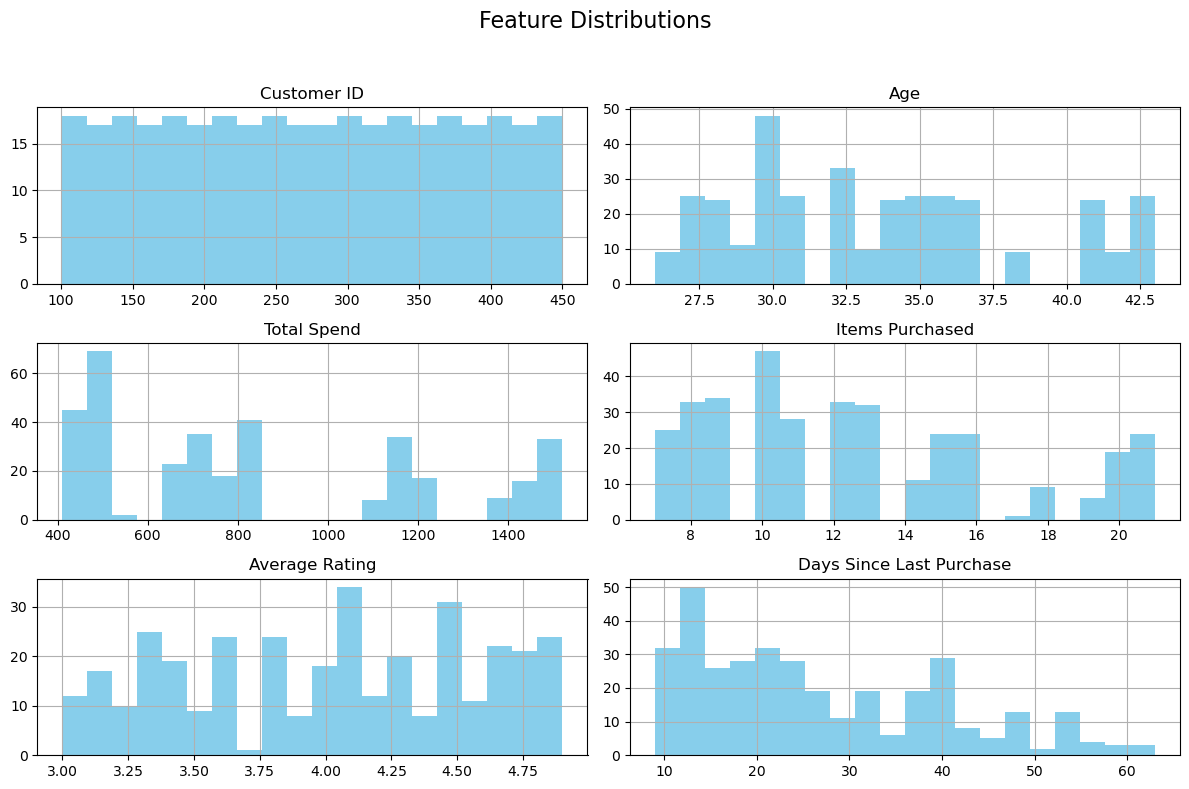

In [57]:
df.hist(figsize=(12, 8), bins=20, color='skyblue')
plt.suptitle('Feature Distributions',fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

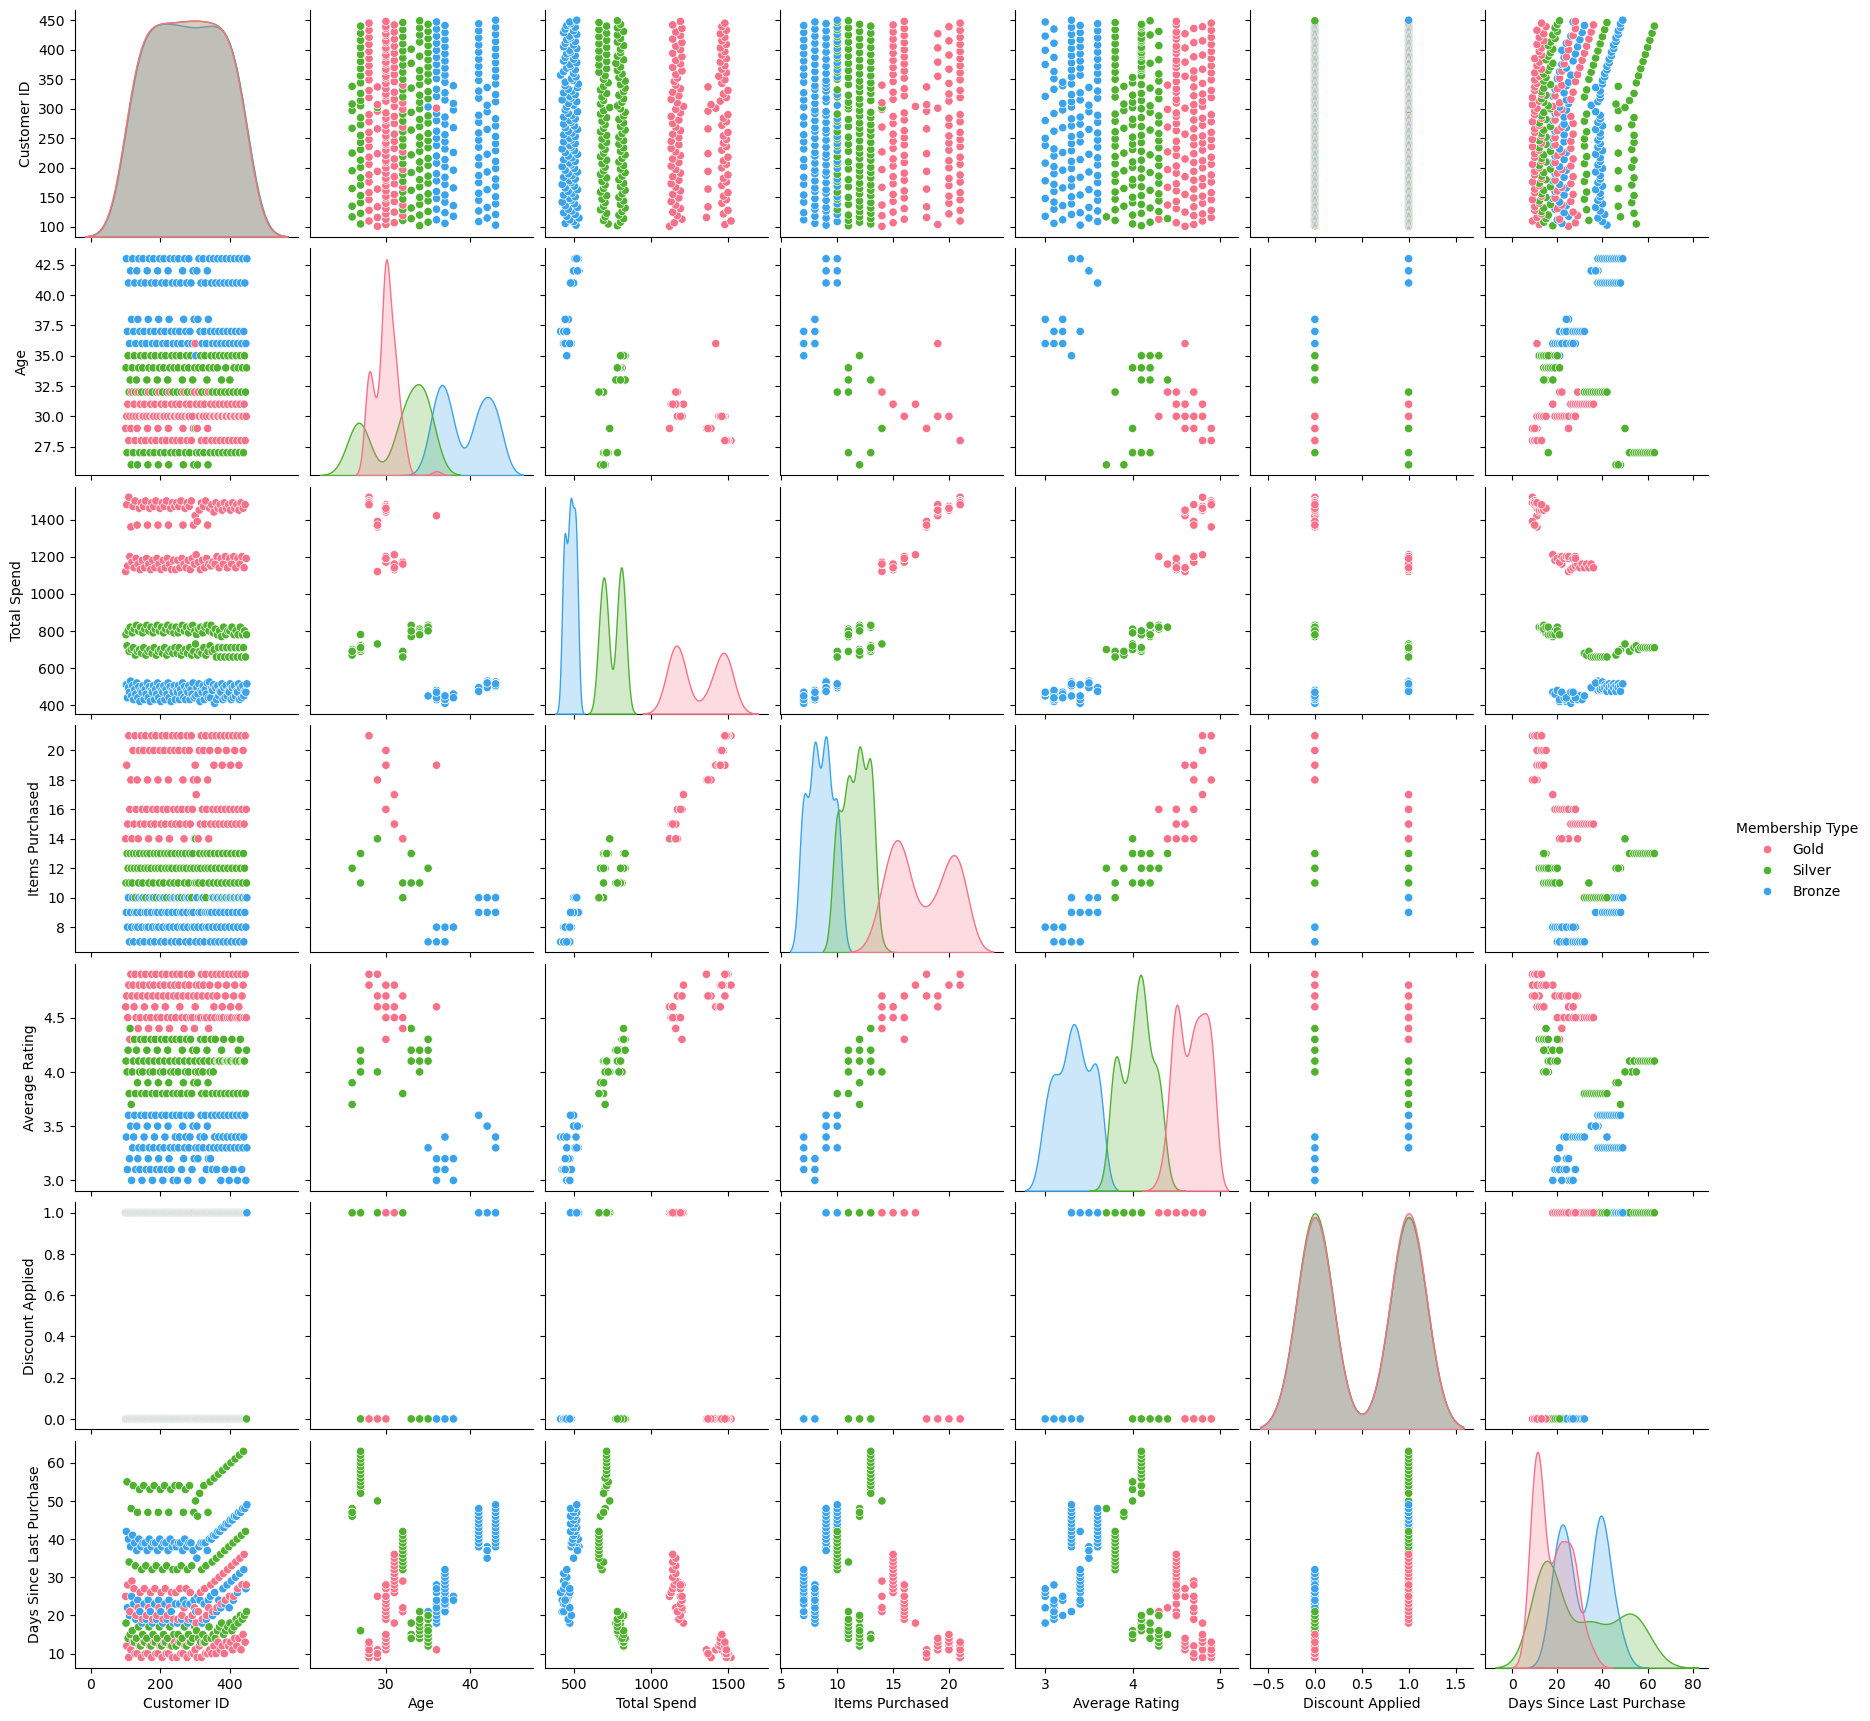

In [58]:
sns.pairplot(df, hue='Membership Type', palette='husl')
plt.show()

Pie chart for gender distribution

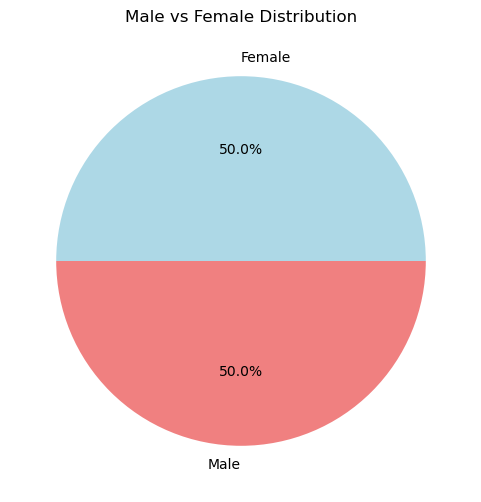

In [63]:
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Male vs Female Distribution')
plt.ylabel('')
plt.show()


 Gender vs Satisfaction Level

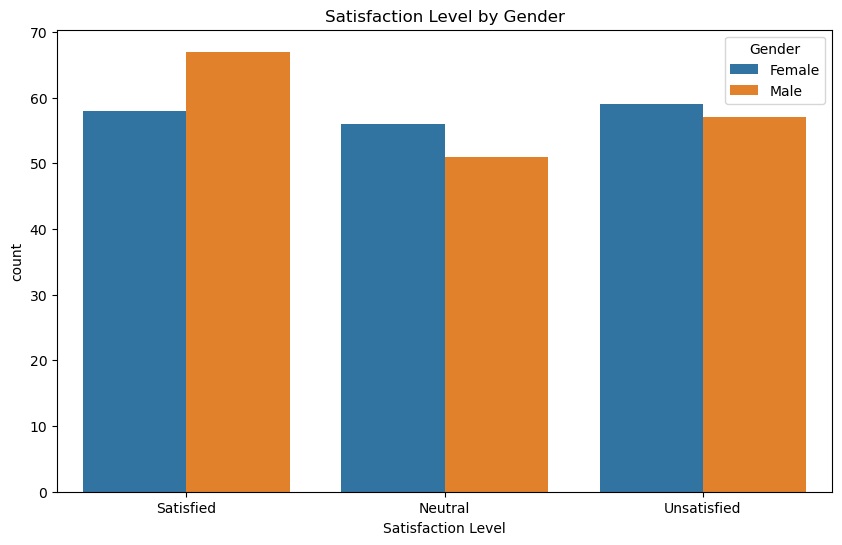

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(x='Satisfaction Level', hue='Gender', data=df)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.title('Satisfaction Level by Gender')
plt.show()

Membership Type Pie Chart

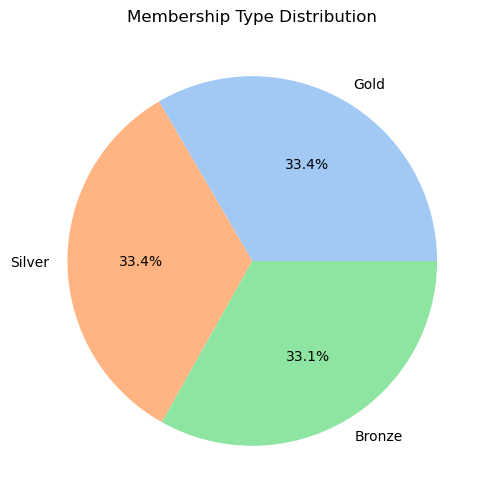

In [65]:
label_encoder_membership = LabelEncoder()
df['Membership Type'] = label_encoder_membership.fit_transform(df['Membership Type'].astype(str))

# Inverse Transform to get actual names
df['Membership Type'] = label_encoder_membership.inverse_transform(df['Membership Type'])

# Plot Pie Chart
plt.figure(figsize=(6,6))
df['Membership Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Membership Type Distribution')
plt.ylabel('')
plt.show()

 Membership Type by City

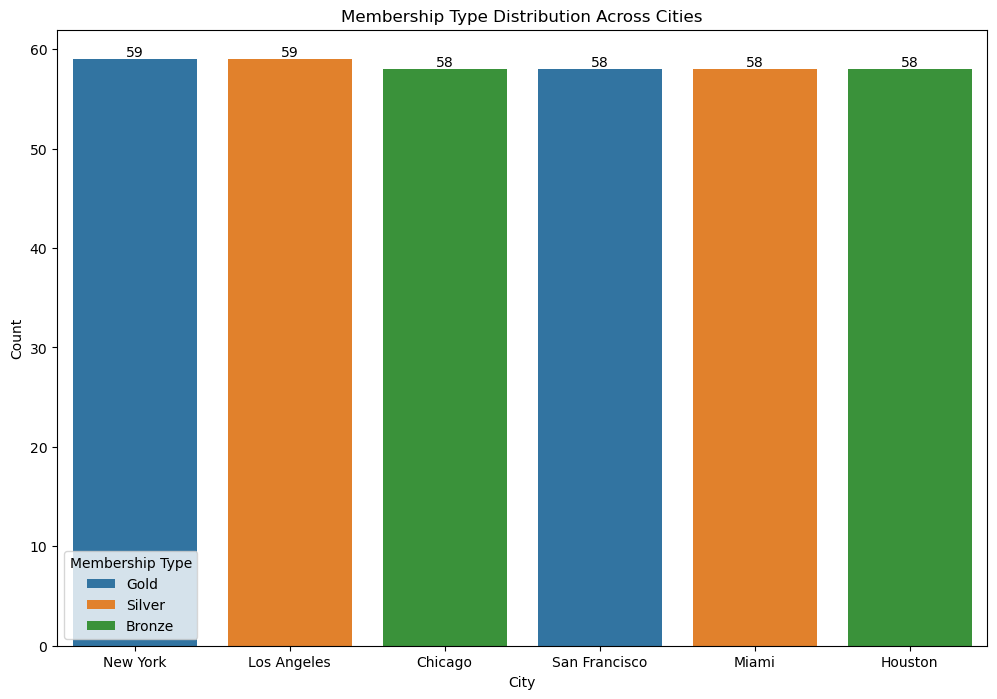

In [66]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='City', hue='Membership Type', data=df)

# Display count values
for container in ax.containers:
    ax.bar_label(container)

plt.title('Membership Type Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Membership Type')
plt.show()

In [67]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


Label Encoding

In [68]:
label_cols = ['Gender', 'City', 'Membership Type', 'Satisfaction Level']
label_encoder = LabelEncoder()

for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [69]:
if 'Discount Applied' in df.columns:
    df['Discount Applied'] = df['Discount Applied'].astype(int)

In [70]:
scaler = StandardScaler()
numeric_cols = ['Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [71]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,0.760130,0.337346,1.001981,1,-0.118359,1
1,102,1,34,2,2,-0.179459,-0.385538,0.139479,0,-0.639907,0
2,103,0,43,0,0,-0.925570,-0.867461,-1.068024,1,1.148256,2
3,104,1,30,5,1,1.756144,1.542153,1.174482,0,-1.086947,1
4,105,1,27,3,2,-0.345692,0.096385,-0.033022,1,2.116844,2


In [72]:
df.drop('Customer ID', axis=1, inplace=True)


In [73]:
print(df.columns)


Index(['Gender', 'Age', 'City', 'Membership Type', 'Total Spend',
       'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')


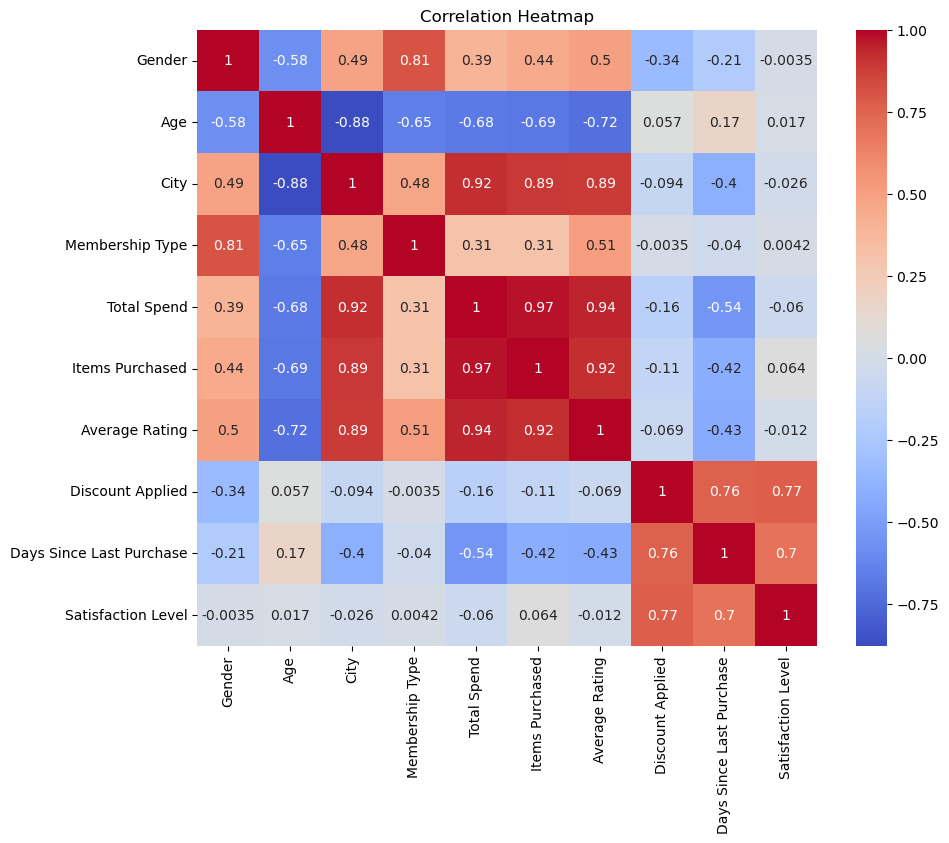

In [74]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [75]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,0,29,4,1,0.760130,0.337346,1.001981,1,-0.118359,1
1,1,34,2,2,-0.179459,-0.385538,0.139479,0,-0.639907,0
2,0,43,0,0,-0.925570,-0.867461,-1.068024,1,1.148256,2
3,1,30,5,1,1.756144,1.542153,1.174482,0,-1.086947,1
4,1,27,3,2,-0.345692,0.096385,-0.033022,1,2.116844,2


In [76]:
import skfuzzy as fuzz
from sklearn.decomposition import PCA

In [77]:
# Select numeric features for clustering
features = ['Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

# Extract data for clustering
X = df[features].values


In [78]:
# Set parameters
n_clusters = 3
error = 0.005
max_iter = 1000

# Apply Fuzzy C-Means
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X.T, n_clusters, 2, error=error, maxiter=max_iter, init=None
)

# Get cluster labels
cluster_labels = np.argmax(u, axis=0)
df['Cluster'] = cluster_labels

print("Fuzzy Partition Coefficient (FPC):", fpc)


Fuzzy Partition Coefficient (FPC): 0.7144415953709041


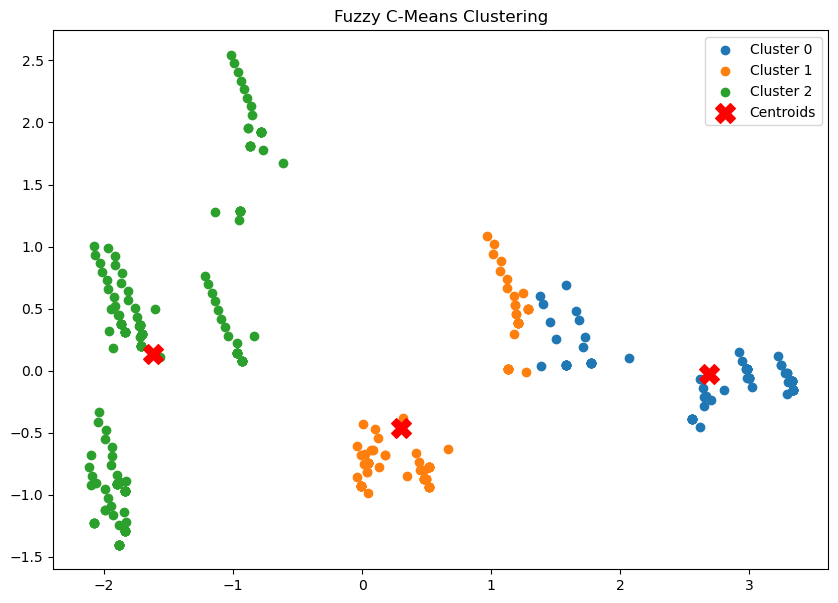

In [79]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(10,7))
for i in range(n_clusters):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i}')

plt.scatter(pca.transform(cntr)[:, 0], pca.transform(cntr)[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Fuzzy C-Means Clustering')
plt.legend()
plt.show()


In [80]:
membership_df = pd.DataFrame(u.T, columns=[f'Cluster {i}' for i in range(n_clusters)])

# Display the first few membership values
print("Membership Values (First 10 rows):")
print(membership_df.head(10))

Membership Values (First 10 rows):
   Cluster 0  Cluster 1  Cluster 2
0   0.299368   0.597040   0.103593
1   0.018014   0.940386   0.041600
2   0.010896   0.038264   0.950839
3   0.984043   0.011880   0.004077
4   0.131262   0.298869   0.569869
5   0.054954   0.211185   0.733861
6   0.355568   0.525233   0.119199
7   0.025963   0.940751   0.033285
8   0.008487   0.034129   0.957383
9   0.936129   0.045823   0.018048


In [81]:
print(f"Fuzzy Partition Coefficient (FPC): {fpc}")


Fuzzy Partition Coefficient (FPC): 0.7144415953709041


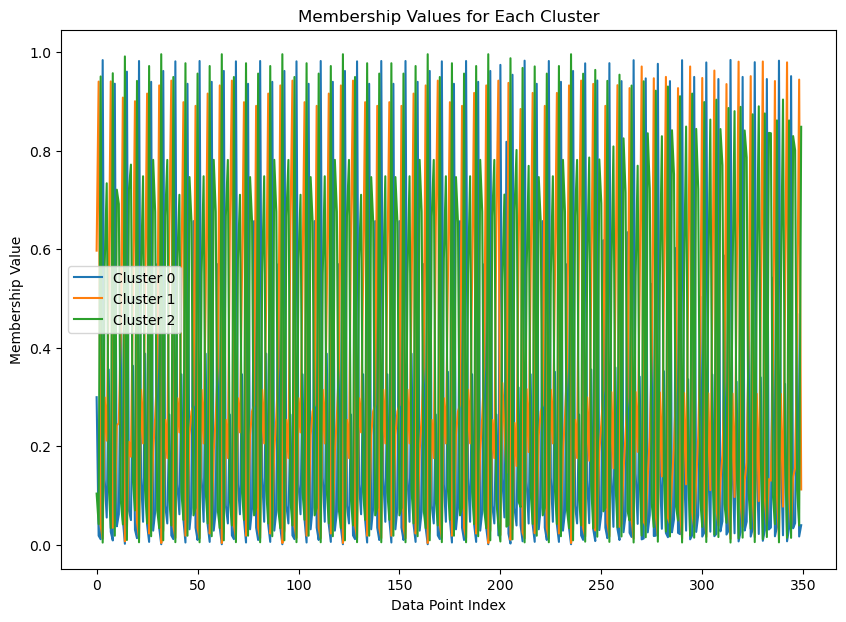

In [82]:
plt.figure(figsize=(10,7))
for i in range(n_clusters):
    plt.plot(membership_df.index, membership_df[f'Cluster {i}'], label=f'Cluster {i}')

plt.xlabel('Data Point Index')
plt.ylabel('Membership Value')
plt.title('Membership Values for Each Cluster')
plt.legend()
plt.show()


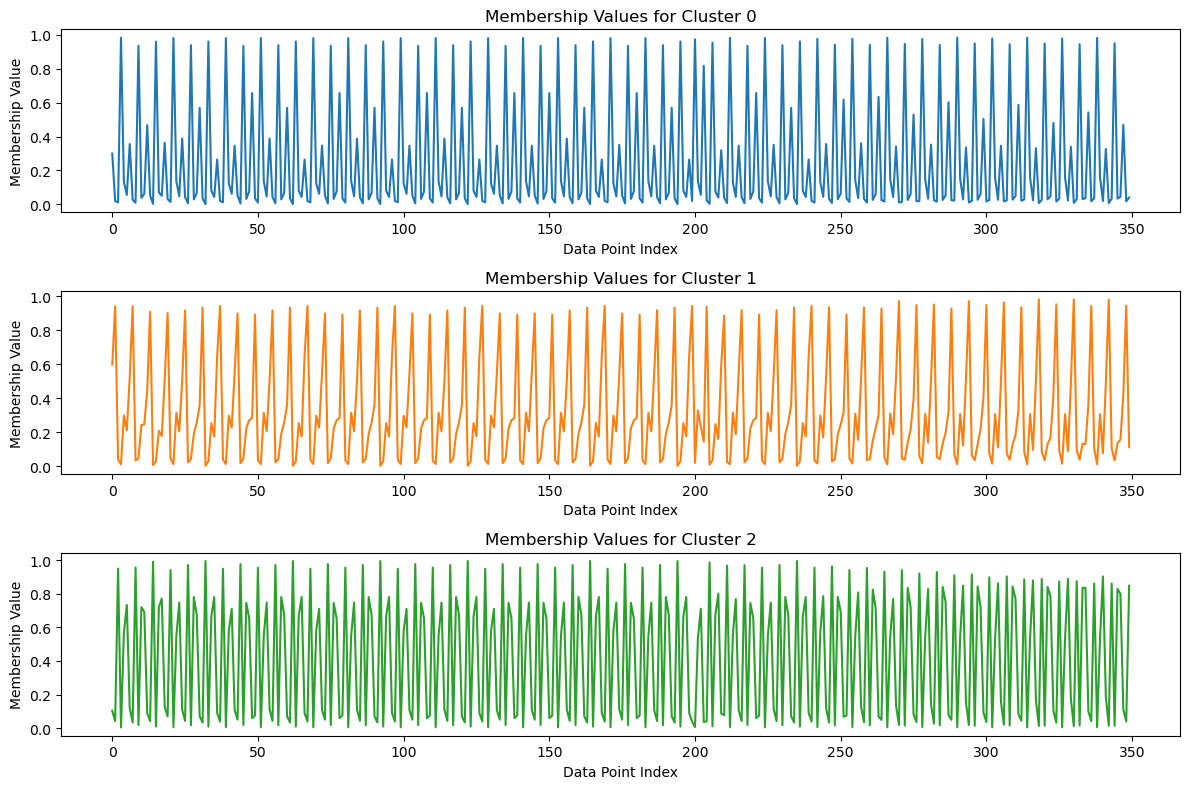

In [83]:
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    plt.subplot(n_clusters, 1, i+1)
    plt.plot(membership_df.index, membership_df[f'Cluster {i}'], color=sns.color_palette('tab10')[i])
    plt.title(f'Membership Values for Cluster {i}')
    plt.xlabel('Data Point Index')
    plt.ylabel('Membership Value')

plt.tight_layout()
plt.show()


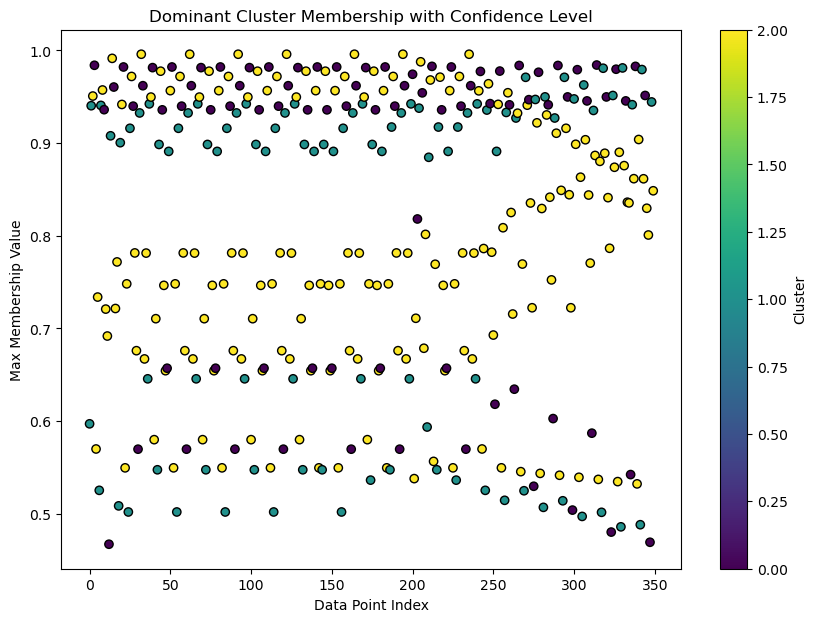

In [84]:
plt.figure(figsize=(10, 7))
colors = np.argmax(u.T, axis=1)
plt.scatter(df.index, np.max(u.T, axis=1), c=colors, cmap='viridis', edgecolor='k')
plt.colorbar(label='Cluster')
plt.title('Dominant Cluster Membership with Confidence Level')
plt.xlabel('Data Point Index')
plt.ylabel('Max Membership Value')
plt.show()


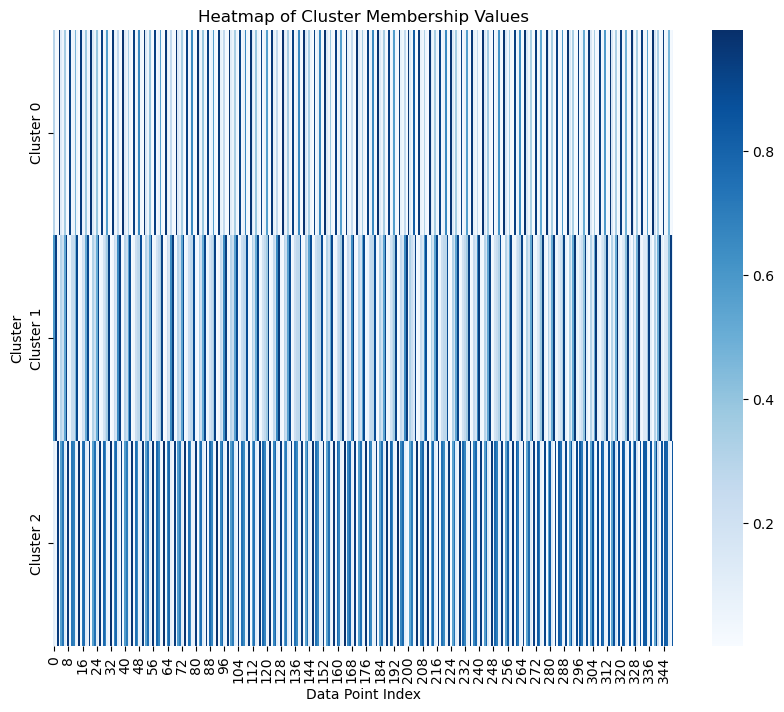

In [85]:
plt.figure(figsize=(10, 8))
sns.heatmap(membership_df.T, cmap='Blues', annot=False)
plt.title('Heatmap of Cluster Membership Values')
plt.xlabel('Data Point Index')
plt.ylabel('Cluster')
plt.show()


In [86]:
import joblib

# Assuming `u` and `cntr` are your membership matrix and cluster centers
joblib.dump([u, cntr], 'fcm_model.pkl')
print("Model saved successfully.")


Model saved successfully.
